### Loading the saved data&target

In [1]:
import numpy as np

data=np.load('dataChestXray.npy')
target=np.load('targetChestXray.npy')
print(data.shape[1:])

(128, 128, 1)


### CNN Architecture

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Splliting the data and target

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

### Training the dataset

In [4]:
history=model.fit(train_data,train_target,epochs=8)

Epoch 1/8
131/131 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.7268 - loss: 0.6257
Epoch 2/8
131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.8699 - loss: 0.2971
Epoch 3/8
131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.9164 - loss: 0.2174
Epoch 4/8
131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.9183 - loss: 0.2083
Epoch 5/8
131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9366 - loss: 0.1685
Epoch 6/8
131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9474 - loss: 0.1590
Epoch 7/8
131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.9499 - loss: 0.1345
Epoch 8/8
131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.9576 - loss: 0.1297


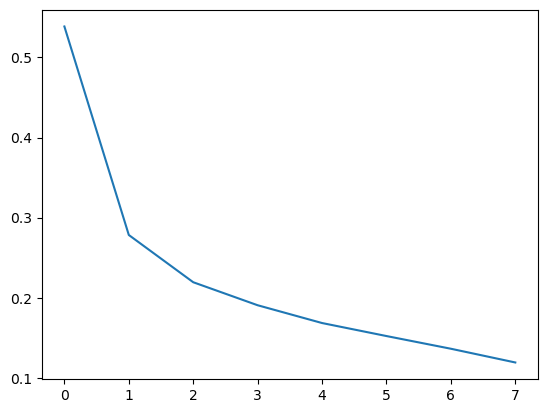

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

[0.7535954117774963, 0.8796740174293518, 0.9158676862716675, 0.9288111329078674, 0.9360018968582153, 0.9484659433364868, 0.9508628845214844, 0.9597315192222595]
0.9597315192222595


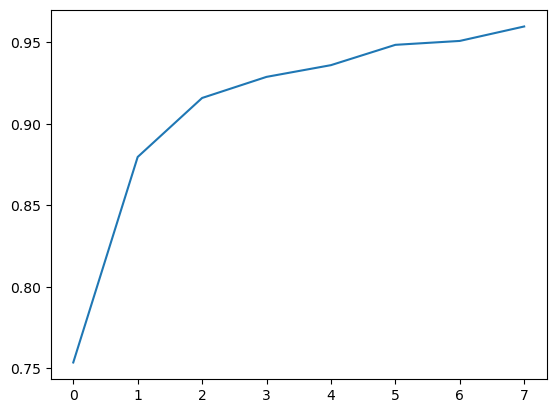

In [6]:
plt.plot(history.history['accuracy'])
a = history.history['accuracy']
print(a)
print(a[-1])

In [7]:
print(model.evaluate(test_data,test_target))

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9686 - loss: 0.0995
[0.09089712053537369, 0.9712643623352051]


### Saving the model

In [8]:
model.save("Pnemonia_predictions_using_chest_xray.keras")